In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import scipy.stats as stats
from IPython.display import display
import pandas as pd
from utils import *

In [2]:
@timer_func
@multi_thread_wrapper
@multi_input_wrapper
@compute_CIR
def Algo_2nd_CIR(sigma,a,k,n,x0,N):
    return CIR_2nd(sigma,a,k,n,x0,N)

@timer_func
@multi_thread_wrapper
@multi_input_wrapper
@compute_CIR
def Algo_3rd_CIR(sigma,a,k,n,x0,N):
    return CIR_3rd(sigma,a,k,n,x0,N)

In [3]:
@timer_func
@multi_thread_wrapper
@multi_input_wrapper
@compute_CIR
def Euler(sigma,a,k,n,x0,N,method):
    return{
            "Euler_DD":Euler_DD,
            "Euler_HM":Euler_HM,
            "Euler_L": Euler_L,
            "Euler_B":Euler_B}[method](sigma,a,k,n,x0,N)

Function 'Euler' executed in 0.0000s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0160s
Function 'Euler' executed in 0.0313s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0867s
Function 'Euler' executed in 0.0145s
Function 'Euler' executed in 0.0000s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0231s
Function 'Euler' executed in 0.0241s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0000s
Function 'Euler' executed in 0.0160s
Function 'Euler' executed in 0.0000s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0156s
F

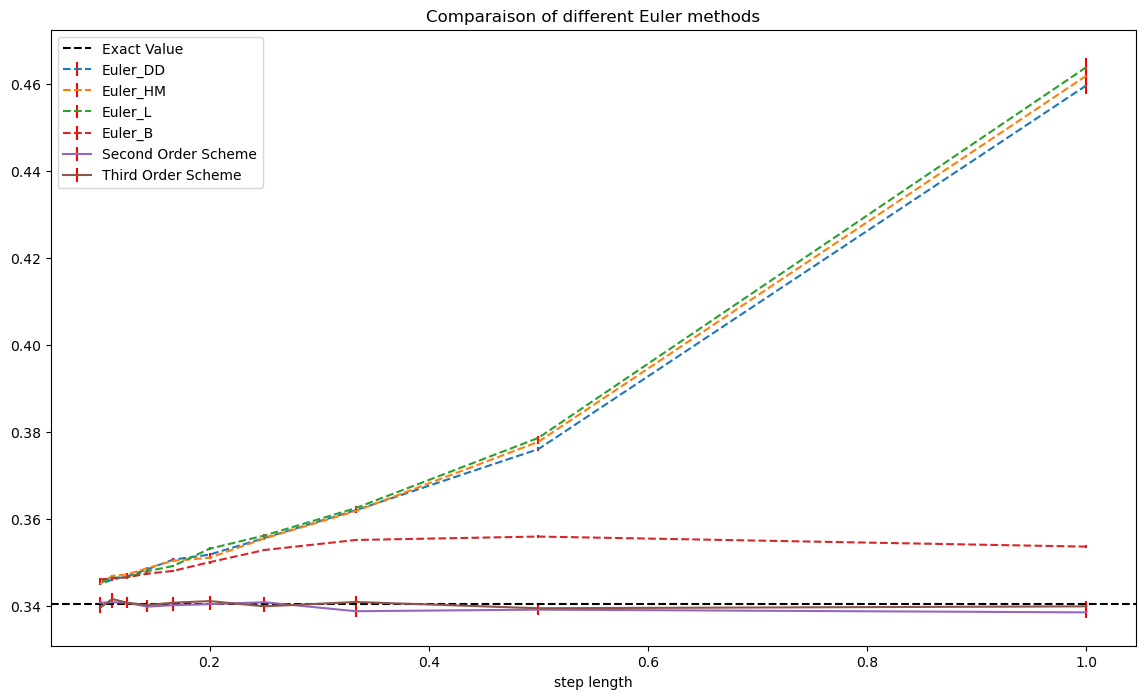

In [4]:
a = 1/2
k = 1/2
x0 = 3/2
sigma = 0.8
N = 100000
t = 1
n_min = 1
n_max = 10
xx = np.array(range(n_min,n_max+1))

alpha=0.05
Z=stats.norm.ppf(1-alpha/2)
times = 1

methods = ["Euler_DD","Euler_HM","Euler_L","Euler_B"]


fig,ax = plt.subplots(figsize=(14,8))
for method in methods:
    param_dicts=[{'x0':np.array([x0]*N),'k':k,'a':a,'sigma':sigma,'n':n,'N':N,'method':method} for n in xx]
    yy=[esperance_CIR(times)(Euler)([param_dict]) for param_dict in param_dicts]
    ax.errorbar(1/xx,np.mean(yy,axis = 1),np.var(yy,axis = 1)*Z/(np.sqrt(times*N)),ecolor='r',ls = '--',label = method )

param_dicts=[{'x0':np.array([x0]*N),'k':k,'a':a,'sigma':sigma,'n':n,'N':N} for n in xx]
yy2=[esperance_CIR(times)(Algo_2nd_CIR)([param_dict]) for param_dict in param_dicts]
yy_err2=np.sqrt(np.var(yy2,axis=1))*Z/np.sqrt(times*N)

yy3=[esperance_CIR(times)(Algo_3rd_CIR)([param_dict]) for param_dict in param_dicts]
yy_err3=np.sqrt(np.var(yy3,axis=1))*Z/np.sqrt(times*N)

ax.errorbar(1/xx,np.mean(yy2,axis=1),yy_err2,ecolor='r',label = 'Second Order Scheme')
ax.errorbar(1/xx,np.mean(yy3,axis=1),yy_err3,ecolor='r',label = 'Third Order Scheme')

ax.axhline(y = exact_expectation(x0,a,sigma,k,t),label="Exact Value",color ='black',ls="--")
ax.legend()
plt.xlabel("step length")
plt.title("Comparaison of different Euler methods")
plt.show()

In [5]:
alpha=0.05
Z=stats.norm.ppf(1-alpha/2)

times=10
N = 1000000

param_dicts=[{'x0':np.array([x0]*N),'k':k,'a':a,'sigma':sigma,'n':n,'N':N} for n in xx]
yy2=[esperance_CIR(times)(Algo_2nd_CIR)([param_dict]) for param_dict in param_dicts]
yy_err2=np.sqrt(np.var(yy2,axis=1))*Z/np.sqrt(times*N)

yy3=[esperance_CIR(times)(Algo_3rd_CIR)([param_dict]) for param_dict in param_dicts]
yy_err3=np.sqrt(np.var(yy3,axis=1))*Z/np.sqrt(times*N)

Function 'Algo_2nd_CIR' executed in 0.6159s
Function 'Algo_2nd_CIR' executed in 0.7918s
Function 'Algo_2nd_CIR' executed in 1.0286s
Function 'Algo_2nd_CIR' executed in 1.2497s
Function 'Algo_2nd_CIR' executed in 1.4390s
Function 'Algo_2nd_CIR' executed in 1.7090s
Function 'Algo_2nd_CIR' executed in 1.9783s
Function 'Algo_2nd_CIR' executed in 2.1075s


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\CHZ\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\CHZ\AppData\Local\Temp\ipykernel_10124\1445005060.py", line 8, in <module>
    yy2=[esperance_CIR(times)(Algo_2nd_CIR)([param_dict]) for param_dict in param_dicts]
  File "C:\Users\CHZ\AppData\Local\Temp\ipykernel_10124\1445005060.py", line 8, in <listcomp>
    yy2=[esperance_CIR(times)(Algo_2nd_CIR)([param_dict]) for param_dict in param_dicts]
  File "C:\OneDrive - sjtu.edu.cn\X\3A\EA1\SDE\code\utils.py", line 47, in wrapper
    for result in func(kwargss * times):
  File "C:\OneDrive - sjtu.edu.cn\X\3A\EA1\SDE\code\utils.py", line 27, in wrap_func
    result = func(*args, **kwargs)
  File "C:\OneDrive - sjtu.edu.cn\X\3A\EA1\SDE\code\utils.py", line 94, in wrapper
    pool.join()
  File "C:\Users\CHZ\anaconda3\lib\multiprocessing\pool.py", line 662, in join
    self._worker_h

TypeError: object of type 'NoneType' has no len()

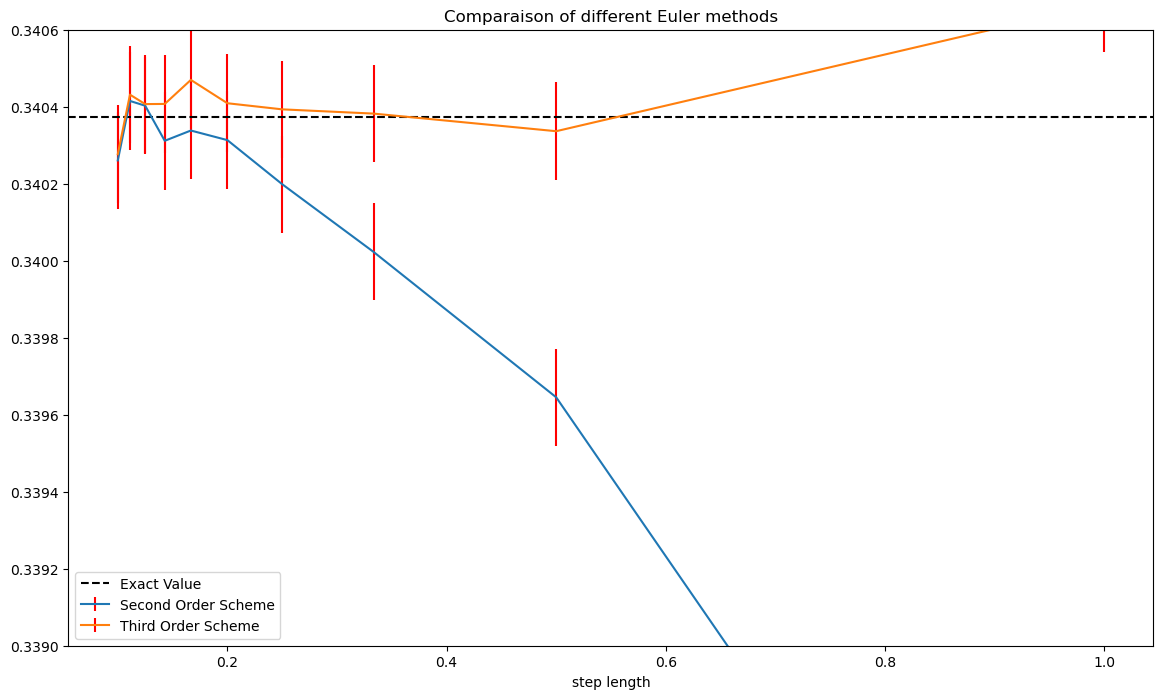

In [6]:
fig,ax = plt.subplots(figsize=(14,8))
ax.errorbar(1/xx,np.mean(yy2 ,axis = 1),yy_err2,ecolor='r',label = 'Second Order Scheme')
ax.errorbar(1/xx,np.mean(yy3 ,axis = 1),yy_err3,ecolor='r',label = 'Third Order Scheme')

ax.axhline(y = exact_expectation(x0,a,sigma,k,t),label="Exact Value",color ='black',ls="--")
ax.legend()
plt.xlabel("step length")
plt.title("Comparaison of different Euler methods")
plt.ylim(0.3390,0.3406)
plt.show()

Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0000s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0166s
Function 'Euler' executed in 0.0150s
Function 'Euler' executed in 0.0313s
Function 'Euler' executed in 0.0312s
Function 'Euler' executed in 0.0473s
Function 'Euler' executed in 0.0313s
Function 'Euler' executed in 0.0000s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0192s
Function 'Euler' executed in 0.0125s
Function 'Euler' executed in 0.0157s
Function 'Euler' executed in 0.0312s
Function 'Euler' executed in 0.0378s
Function 'Euler' executed in 0.0313s
Function 'Euler' executed in 0.0313s
Function 'Euler' executed in 0.0000s
Function 'Euler' executed in 0.0157s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0155s
Function 'Euler' executed in 0.0157s
Function 'Euler' executed in 0.0156s
Function 'Euler' executed in 0.0312s
F

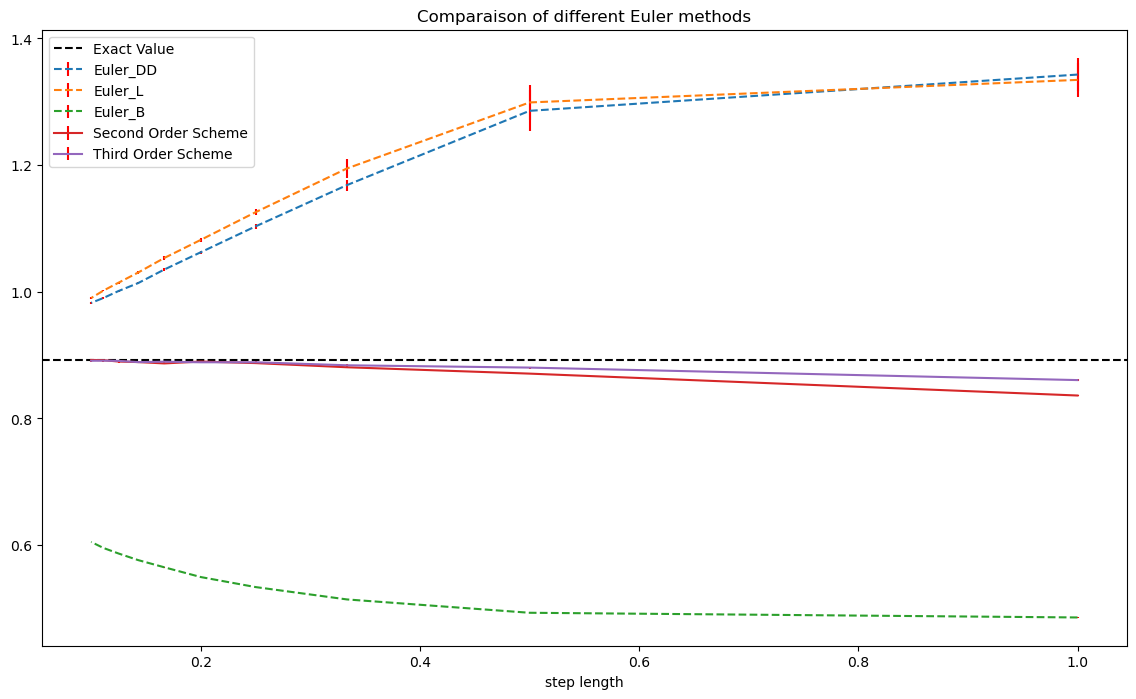

In [7]:
a = 0.04
k = 0.1
x0 = 0.3
sigma = 2
N = 100000
t = 1
n_min = 1
n_max = 10
xx = np.array(range(n_min,n_max+1))

alpha=0.05
Z=stats.norm.ppf(1-alpha/2)
times = 1

methods = ["Euler_DD","Euler_L","Euler_B"]


fig,ax = plt.subplots(figsize=(14,8))
for method in methods:
    param_dicts=[{'x0':np.array([x0]*N),'k':k,'a':a,'sigma':sigma,'n':n,'N':N,'method':method} for n in xx]
    yy=[esperance_CIR(times)(Euler)([param_dict]) for param_dict in param_dicts]
    ax.errorbar(1/xx,np.mean(yy,axis = 1),np.var(yy,axis = 1)*Z/(np.sqrt(times*N)),ecolor='r',ls = '--',label = method )

param_dicts=[{'x0':np.array([x0]*N),'k':k,'a':a,'sigma':sigma,'n':n,'N':N} for n in xx]
yy2=[esperance_CIR(times)(Algo_2nd_CIR)([param_dict]) for param_dict in param_dicts]
yy_err2=np.sqrt(np.var(yy2,axis=1))*Z/np.sqrt(times*N)

yy3=[esperance_CIR(times)(Algo_3rd_CIR)([param_dict]) for param_dict in param_dicts]
yy_err3=np.sqrt(np.var(yy3,axis=1))*Z/np.sqrt(times*N)

ax.errorbar(1/xx,np.mean(yy2,axis=1),yy_err2,ecolor='r',label = 'Second Order Scheme')
ax.errorbar(1/xx,np.mean(yy3,axis=1),yy_err3,ecolor='r',label = 'Third Order Scheme')

ax.axhline(y = exact_expectation(x0,a,sigma,k,t),label="Exact Value",color ='black',ls="--")
ax.legend()
plt.xlabel("step length")
plt.title("Comparaison of different Euler methods")
plt.show()

In [8]:
alpha=0.05
Z=stats.norm.ppf(1-alpha/2)
times=10
N = 1000000
xx = [1,10,20,30,40,50]
param_dicts=[{'x0':np.array([x0]*N),'k':k,'a':a,'sigma':sigma,'n':n,'N':N} for n in xx]
yy2=[esperance_CIR(times)(Algo_2nd_CIR)([param_dict]) for param_dict in param_dicts]
yy_err2=np.sqrt(np.var(yy2,axis=1))*Z/np.sqrt(times*N)

yy3=[esperance_CIR(times)(Algo_3rd_CIR)([param_dict]) for param_dict in param_dicts]
yy_err3=np.sqrt(np.var(yy3,axis=1))*Z/np.sqrt(times*N)

Function 'Algo_2nd_CIR' executed in 1.0768s
Function 'Algo_2nd_CIR' executed in 5.0644s
Function 'Algo_2nd_CIR' executed in 9.3257s
Function 'Algo_2nd_CIR' executed in 13.6702s
Function 'Algo_2nd_CIR' executed in 17.4364s
Function 'Algo_2nd_CIR' executed in 24.2216s
Function 'Algo_3rd_CIR' executed in 4.6306s
Function 'Algo_3rd_CIR' executed in 25.4062s
Function 'Algo_3rd_CIR' executed in 47.6103s
Function 'Algo_3rd_CIR' executed in 68.8470s
Function 'Algo_3rd_CIR' executed in 92.2095s
Function 'Algo_3rd_CIR' executed in 113.0493s


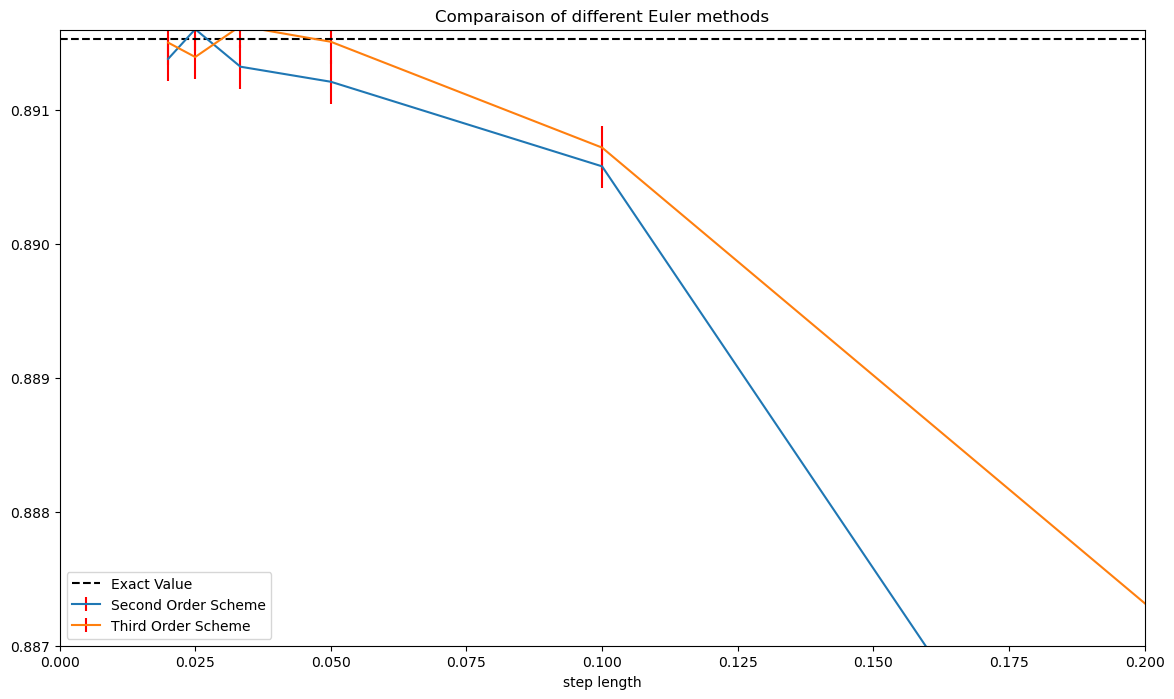

In [9]:
fig,ax = plt.subplots(figsize=(14,8))
xx = np.array(xx)
ax.errorbar(1/xx,np.mean(yy2,axis=1),yy_err2,ecolor='r',label = 'Second Order Scheme')
ax.errorbar(1/xx,np.mean(yy3,axis=1),yy_err3,ecolor='r',label = 'Third Order Scheme')

ax.axhline(y = exact_expectation(x0,a,sigma,k,t),label="Exact Value",color ='black',ls="--")

ax.legend()
plt.xlabel("step length")
plt.title("Comparaison of different Euler methods")
plt.ylim(0.8870,0.8916)
plt.xlim(0,0.2)
plt.show()